# US School Analysis

## Start with imports and reading in your data

In [1]:
# Include all your imports here
import pandas as pd
from pathlib import Path


In [2]:
# Load the Public school dataset
file = "public_school_data.csv"
data = pd.read_csv(file)
data

,NCESSCH,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
0,10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
1,10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
2,10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
3,10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
4,10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100717,780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,NaN,7.0,254.0,NaN,59.0,2.0,6.0
100718,780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,4.0,394.0,2.0,64.0,3.0,9.0
100719,780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,7.0,322.0,1.0,57.0,NaN,9.0
100720,780003000033,VI,Middle,Regular school,763.0,62.0,12.31,1.0,7.0,583.0,NaN,153.0,1.0,18.0


In [3]:
# Load the Public school locations dataset
file = "public_school_locations.csv"
locations = pd.read_csv(file)
locations

,ID,LATCOD,LONCOD
0,10000500870,34.260200,-86.206200
1,10000500871,34.262200,-86.204900
2,10000500879,34.273300,-86.220100
3,10000500889,34.252700,-86.221806
4,10000501616,34.289800,-86.193300
...,...,...,...
100717,780003000024,18.341950,-64.917602
100718,780003000026,18.338742,-64.952483
100719,780003000027,18.354782,-64.899024
100720,780003000033,18.336658,-64.945940


In [4]:
# Load the Public school data dictionary file
file = "school_data_dictionary.csv"
dictionary = pd.read_csv(file)
dictionary

,Fields,Field Descriptions
0,OBJECTID,OBJECTID
1,Shape,Shape
2,NCESSCH,Unique School ID
3,SURVYEAR,Year corresponding to survey record
4,STABR,Postal state abbreviation code
...,...,...
73,WHALM,All Students - White - Male
74,WHALF,All Students - White - Female
75,WH,All Students - White
76,LATCOD,Latitude


## Data Exploration and Preparation

In [5]:
# Use an .isin() function to keep only fields that appear in the main public_school_data.csv and identify the unique id column 

dictionary = dictionary[dictionary["Fields"].isin(data.columns)]
dictionary

,Fields,Field Descriptions
2,NCESSCH,Unique School ID
12,LSTATE,Location state
21,SCHOOL_LEVEL,School level
25,SCHOOL_TYPE_TEXT,School type (description)
51,TOTAL,Total students all grades (includes AE)
53,FTE,Total Teachers
54,STUTERATIO,Student teacher ratio
57,AM,All Students - American Indian/Alaska Native
60,AS,All Students - Asian
63,BL,All Students - Black or African American


In [6]:
# Ensure the column you selected is indeed a unique identifier by checking the number of uniqe values and comparing it to the number of rows in the dataframe
# check unique values in NCESSCH column of "data"

data_ID_count = len(pd.unique(data['NCESSCH']))
location_ID_count = len(pd.unique(locations['ID']))

print("data unique ID's:", data_ID_count, "locations unique ID's:",  location_ID_count)

#Check unique values in 'data' against unique values in 'locations'?


data unique ID's: 100722 locations unique ID's: 100722


In [7]:
# Change the names of the unique ID column in both the location data and public school data to match and set them as index

data = (data.rename(columns={"NCESSCH" : "School_ID"})
            .set_index("School_ID")
           )
locations = (locations.rename(columns={"ID" : "School_ID"})
                 .set_index("School_ID")
                )



In [8]:
# Check your work
data.head()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
School_ID,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [9]:
# Check your work
locations.head()

,LATCOD,LONCOD
School_ID,,
10000500870,34.2602,-86.206200
10000500871,34.2622,-86.204900
10000500879,34.2733,-86.220100
10000500889,34.2527,-86.221806
10000501616,34.2898,-86.193300


In [10]:
# Join the location and data dataframes together
data_w_location = pd.concat([data , locations], axis = 1)
data_w_location

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
School_ID,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.260200,-86.206200
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.262200,-86.204900
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.273300,-86.220100
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.252700,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.289800,-86.193300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,NaN,7.0,254.0,NaN,59.0,2.0,6.0,18.341950,-64.917602
780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,4.0,394.0,2.0,64.0,3.0,9.0,18.338742,-64.952483
780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,7.0,322.0,1.0,57.0,NaN,9.0,18.354782,-64.899024


In [11]:
# Get the value counts for the school type column
data_w_location["SCHOOL_TYPE_TEXT"].value_counts()

Regular school                  91595
Alternative Education School     5588
Special education school         1946
Career and Technical School      1593
Name: SCHOOL_TYPE_TEXT, dtype: int64

In [12]:
# Create a subset of the dataframe that only includes regular schools ensure it was successful by comparing rows in the subset to the value counts above
regular_schools = data_w_location[data_w_location["SCHOOL_TYPE_TEXT"] == "Regular school"]
regular_schools

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
School_ID,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.260200,-86.206200
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.262200,-86.204900
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.273300,-86.220100
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.252700,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.289800,-86.193300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,NaN,7.0,254.0,NaN,59.0,2.0,6.0,18.341950,-64.917602
780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,4.0,394.0,2.0,64.0,3.0,9.0,18.338742,-64.952483
780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,7.0,322.0,1.0,57.0,NaN,9.0,18.354782,-64.899024


## Data Cleaning and dealing with nulls

In [13]:
# Check for nulls and determine the best approach for dealing with them
regular_schools.isnull()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
School_ID,,,,,,,,,,,,,,,
10000500870,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10000500871,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10000500879,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10000500889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10000501616,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780003000024,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
780003000026,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
780003000027,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [34]:
# Fill some of the columns with 0 where it makes sense

# WRONG this creates new df with selected columns:
#regular_schools[['AM', 'AS', 'BL', 'HP', 'HI', 'TR', 'WH']].fillna(0)

#WORKS but gives warning
#regular_schools[['AM', 'AS', 'BL', 'HP', 'HI', 'TR', 'WH']] = regular_schools[['AM', 'AS', 'BL', 'HP', 'HI', 'TR', 'WH']].fillna(0)


/Users/jim/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
School_ID,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.260200,-86.206200
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.262200,-86.204900
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.273300,-86.220100
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.252700,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.289800,-86.193300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,0.0,7.0,254.0,0.0,59.0,2.0,6.0,18.341950,-64.917602
780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,4.0,394.0,2.0,64.0,3.0,9.0,18.338742,-64.952483
780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,7.0,322.0,1.0,57.0,0.0,9.0,18.354782,-64.899024


In [14]:
regular_schools_new = pd.DataFrame(
    {'State' : regular_schools['LSTATE'],
     'School Level' : regular_schools['SCHOOL_LEVEL'],
     'School Type' : regular_schools['SCHOOL_TYPE_TEXT'],
     'Total Students' : regular_schools['TOTAL'],
     'Total Teachers' : regular_schools['FTE'],
     'Student-Teacher Ratio' : regular_schools['STUTERATIO'],
     'American Indian/Alaska Native' : regular_schools['AM'].fillna(0),
     'Asian' : regular_schools['TR'].fillna(0),
     'Black' : regular_schools['BL'].fillna(0),
     'Hawaiian/Pacific' : regular_schools['HP'].fillna(0),
     'Hispanic' : regular_schools['HI'].fillna(0),
     'Two or More' : regular_schools['TR'].fillna(0),
     'White' : regular_schools['WH'].fillna(0)} 
)
regular_schools_new


,State,School Level,School Type,Total Students,Total Teachers,Student-Teacher Ratio,American Indian/Alaska Native,Asian,Black,Hawaiian/Pacific,Hispanic,Two or More,White
School_ID,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,29.0,33.0,0.0,469.0,29.0,371.0
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,38.0,70.0,0.0,785.0,38.0,706.0
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,29.0,24.0,1.0,481.0,29.0,345.0
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,15.0,48.0,0.0,497.0,15.0,340.0
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,13.0,33.0,0.0,288.0,13.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780003000024,VI,Elementary,Regular school,328.0,26.0,12.62,0.0,2.0,254.0,0.0,59.0,2.0,6.0
780003000026,VI,Elementary,Regular school,477.0,25.0,19.08,1.0,3.0,394.0,2.0,64.0,3.0,9.0
780003000027,VI,Elementary,Regular school,397.0,29.0,13.69,1.0,0.0,322.0,1.0,57.0,0.0,9.0


In [51]:
# Verify changes to nulls and prepare to drop na
regular_schools_new.isnull()


,State,School_Level,School_Type,Total_Students,Total_Teachers,Student_Teacher_Ratio,American_Indian_Alaska_Native,Asian,Black,Hawaiian_Pacific,Hispanic,Two_or_More,White
School_ID,,,,,,,,,,,,,
10000500870,False,False,False,False,False,False,False,False,False,False,False,False,False
10000500871,False,False,False,False,False,False,False,False,False,False,False,False,False
10000500879,False,False,False,False,False,False,False,False,False,False,False,False,False
10000500889,False,False,False,False,False,False,False,False,False,False,False,False,False
10000501616,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
660000200078,False,False,False,False,False,False,False,False,False,False,False,False,False
660000200079,False,False,False,False,False,False,False,False,False,False,False,False,False
660000200080,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
# Drop remaining nulls wher it would make sense
regular_schools_new = regular_schools_new.dropna()
regular_schools_new

,State,School_Level,School_Type,Total_Students,Total_Teachers,Student_Teacher_Ratio,American_Indian_Alaska_Native,Asian,Black,Hawaiian_Pacific,Hispanic,Two_or_More,White
School_ID,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,29.0,33.0,0.0,469.0,29.0,371.0
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,38.0,70.0,0.0,785.0,38.0,706.0
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,29.0,24.0,1.0,481.0,29.0,345.0
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,15.0,48.0,0.0,497.0,15.0,340.0
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,13.0,33.0,0.0,288.0,13.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
660000200078,GU,High,Regular school,1673.0,90.0,18.59,0.0,31.0,0.0,1028.0,2.0,31.0,5.0
660000200079,GU,High,Regular school,1213.0,73.0,16.62,2.0,8.0,3.0,1102.0,0.0,8.0,8.0
660000200080,GU,High,Regular school,1109.0,71.0,15.62,1.0,18.0,1.0,862.0,0.0,18.0,10.0


In [18]:
# Verify changes to nulls and no nulls should remain


## Plotting to help Clean the Data

<AxesSubplot:title={'center':'Total Students'}, ylabel='Frequency'>

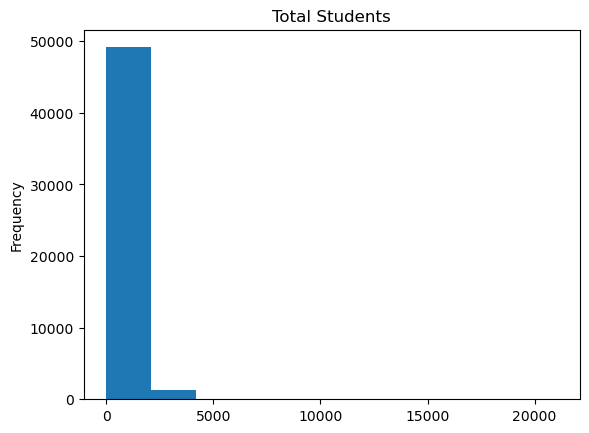

In [71]:
# Plot a histogram of Total enrolled students and check for outliers
regular_schools_new['Total Students'].plot(kind = 'hist', title = 'Total Students')

<AxesSubplot:title={'center':'Total Teachers'}, ylabel='Frequency'>

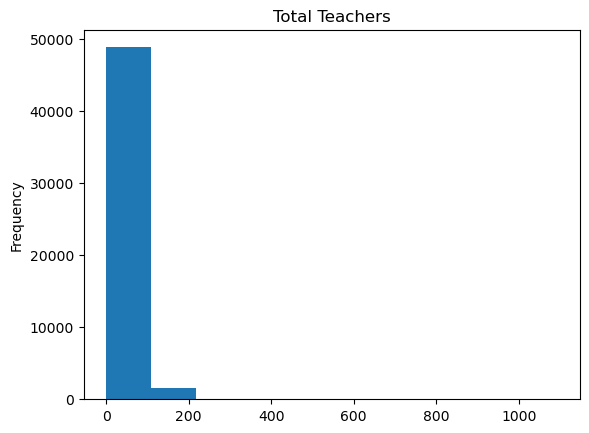

In [72]:
# Plot a histogram of Total Teachers and check for outliers
regular_schools_new['Total Teachers'].plot(kind = 'hist', title = 'Total Teachers')

<AxesSubplot:title={'center':'Student-Teacher Ratio'}, ylabel='Frequency'>

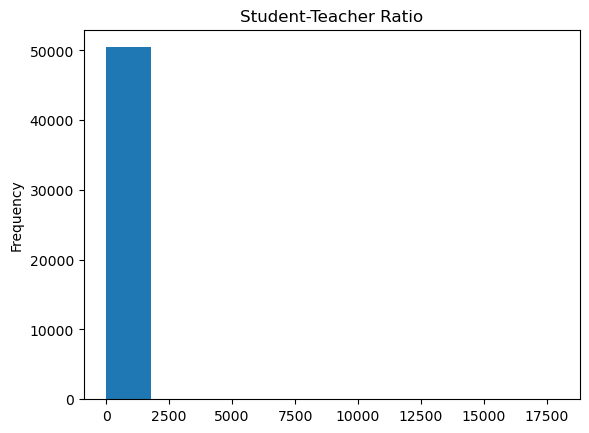

In [74]:
# Plot a histogram of Student Teacher Ratio and check for outliers
regular_schools_new['Student-Teacher Ratio'].plot(kind = 'hist', title = 'Student-Teacher Ratio')

<AxesSubplot:title={'center':'Total Students'}, ylabel='Frequency'>

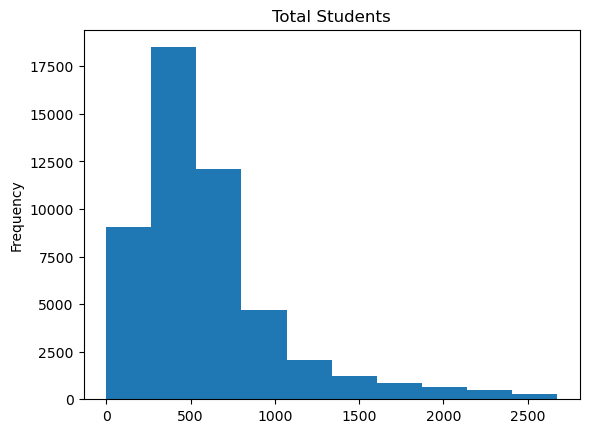

In [86]:
# Re-Plot a histogram of Total enrolled students after removing 0s and outliers above the 99th quantile
# Drop rows where Total students <= 0

q_high = regular_schools_new['Total Students'].quantile(0.99)

# For this and following histogram I will extract column data to a new dataframe to plot 
# without changing input regular_schools dataframe

filter_ratio = regular_schools_new['Total Students'][
    (regular_schools_new['Total Students'] <= q_high) & 
    (regular_schools_new['Total Students'] >= 0)
]
filter_ratio.plot(kind = 'hist',
                 title = 'Total Students',
                 )
                                    

<AxesSubplot:title={'center':'Total Teachers'}, ylabel='Frequency'>

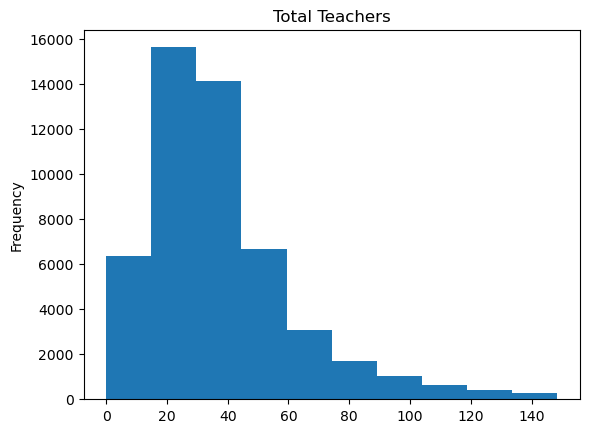

In [87]:
# Re-Plot a histogram of Total Teachers after removing 0s and outliers above the 99th quantile

q_high = regular_schools_new['Total Teachers'].quantile(0.99)
filter_ratio = regular_schools_new['Total Teachers'][
    (regular_schools_new['Total Teachers'] <= q_high) & 
    (regular_schools_new['Total Teachers'] >= 0)
]
filter_ratio.plot(kind = 'hist',
                 title = 'Total Teachers',
                 )



<AxesSubplot:title={'center':'Student-Teacher Ratio'}, ylabel='Frequency'>

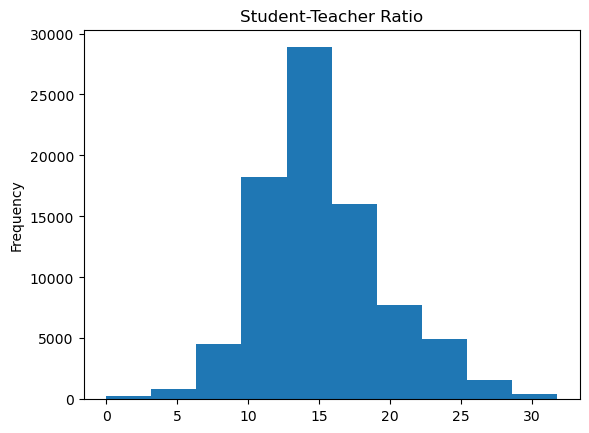

In [21]:
# Re-Plot a histogram of Student Teacher Ratio after removing 0s and outliers above the 99th quantile
# For this histogram I will save changes to regular_schools dataframe for use in analysis below

q_high = regular_schools_new['Student-Teacher Ratio'].quantile(0.99)

# For this histogram I will save changes to regular_schools dataframe for use in analysis below

regular_schools_new['Student-Teacher Ratio'] = regular_schools_new['Student-Teacher Ratio'][
    (regular_schools_new['Student-Teacher Ratio'] <= q_high) & 
    (regular_schools_new['Student-Teacher Ratio'] >= 0)
]
regular_schools_new['Student-Teacher Ratio'].plot(kind = 'hist',
                 title = 'Student-Teacher Ratio',
                 )



## Correlation Plot to Understand Data Relationships

In [25]:
# Use seaborn to generate a correlation heatmap for the columns in the dataframe





## Geographic Plots

In [26]:
# Plot only schools from the 48 contiguous US states or the 50 US states (drop territories and PR)





In [27]:
# Plot only schools in your state





## School Quality Analysis: Student/Teacher Ratios

In [27]:
# Use the dataframe that has filtered out the outliers in Student Teacher Ratio and group by state and get the average
# Show the highest 5 Student/Teacher ratios and lowest 5 Student/Teacher ratios as well as the average for your state

# Group by state:
state_groups = regular_schools_new.groupby('State')
state_groups
#Average student teacher ratio for each state:


In [29]:
# What is the mean of the Student/Teacher Ratio


In [30]:
# What is the standard deviation of the Student/Teacher Ratio


In [31]:
# Plot the states ratios in descending order


In [32]:
# Plot a boxplot of the Student/Teacher Ratios


In [33]:
# List or Plot the Highest 5 states



In [34]:
# List or plot the lowest 5



In [35]:
# Print your state's Student Teacher Ratios



## Summarize your findings from any of the analysis or plots above:
* Were there any interesting Correlations?
* How did your state compare to others?
* Would you have made any different decisions in the earlier cleaning stages after becoming more familiar with the data?
* What is going on in IL?
* What other analysis could be done with this data?

## BONUS: Generate other interesting analysis or plots

In [36]:
# Your code below
